# Quantum Phase Estimation

### Import section

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

import numpy as np
from math import pi

from qiskit import *
from qiskit_aer import QasmSimulator, UnitarySimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_ibm_runtime import *


### Example: T gate

#### $T | 1 \rangle = e^{2i\pi/8} |1\rangle$. To estimate exactly $\theta=1/8$ we need 3 qubits

In [2]:
# define inverse QFT function
def inv_qft(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu(0,-pi/float(2**(j-m)),0,0, m, j)
        circ.h(j)

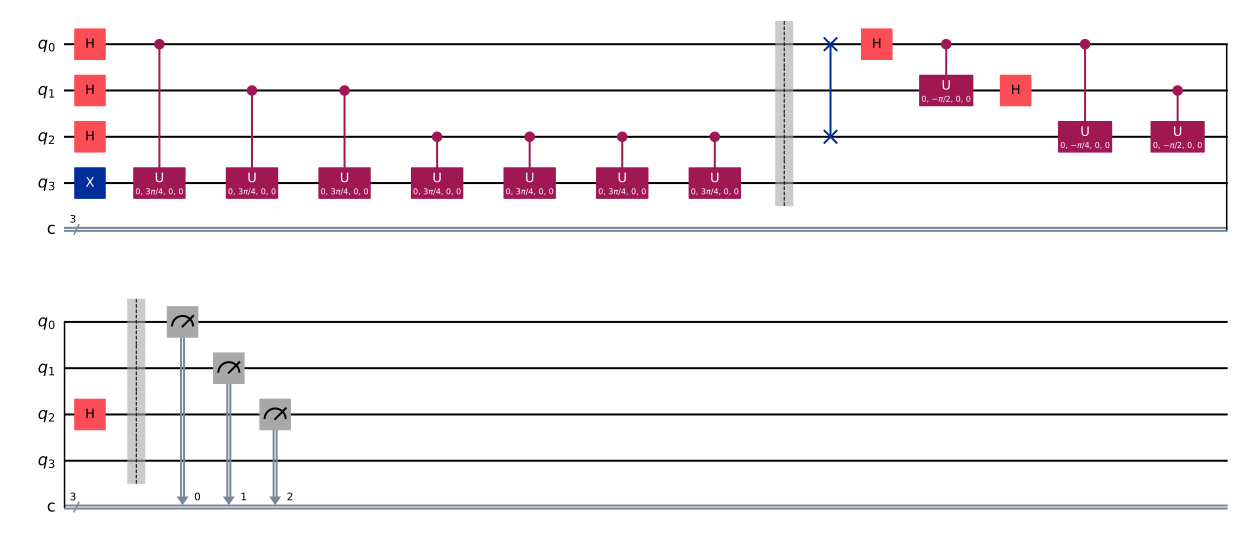

In [3]:
n_q = 4 # 3 for counting, 1 for target
n_b = 3 # we only measure the counting qubits

qc = QuantumCircuit(n_q,n_b)

# initialize target in 1
qc.x(n_b)
# initialize counting qubits in |+>
for iq in range(n_b):
    qc.h(iq)

# perform sequence of CU
# remember that the order is reversed in the graph

theta = 3/8 # here we choose theta*2^n as an integer (3)
repetitions = 1
for counting_qubit in range(n_b):
    for i in range(repetitions):
        qc.cu(0,2*pi*theta,0,0,counting_qubit,n_b) # This is C-U
    repetitions *= 2

qc.barrier()    
# perform now     
inv_qft(qc,n_b)

qc.barrier()    
    
for im in range(n_b):
    qc.measure(im,im)

qc.draw('mpl')


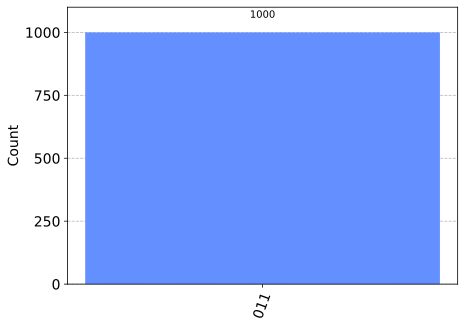

In [4]:
backend = QasmSimulator()
answer = backend.run(qc.decompose(), shots= 1000).result().get_counts()

plot_histogram(answer)

#### 011 is 3 in decimal. Hence $\theta = 3/2^n = 3/8$. The result is exact because $\theta 2^n$ is integer

### Example: $\theta=1/3$

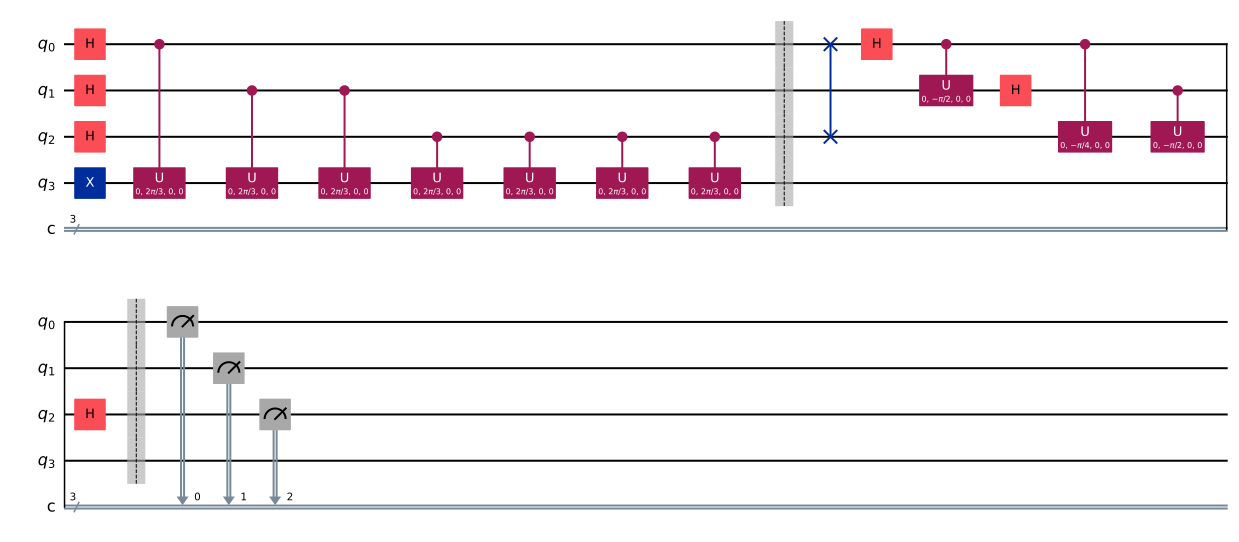

In [5]:
n_q = 4 # 3 for counting, 1 for target
n_b = 3 # we only measure the counting qubits

qc = QuantumCircuit(n_q,n_b)

# initialize target in 1
qc.x(3)
# initialize counting qubits in |+>
for iq in range(n_b):
    qc.h(iq)

# perform sequence of CU
# remember that the order is reversed in the graph

theta = 1/3

repetitions = 1
for counting_qubit in range(n_b):
    for i in range(repetitions):
        qc.cu(0,2*pi*theta,0,0,counting_qubit,n_b) # This is C-U
    repetitions *= 2
    
qc.barrier()    
# perform now     
inv_qft(qc,n_b)

qc.barrier()    
    
for im in range(n_b):
    qc.measure(im,im)

qc.draw('mpl')

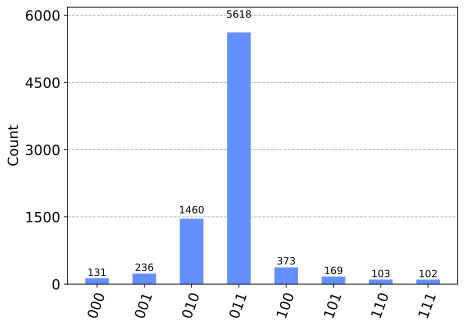

In [6]:
backend = QasmSimulator()
answer = backend.run(qc.decompose(), shots= 8192).result().get_counts()

plot_histogram(answer)

#### We obtain a result between 010 (2 in decimal) and 011 (3), i.e. an estimate for $\theta$ between 2/8=0.25 and 3/8 = 0.375

### We can improve our accuracy by increasing the number of qubits

In [7]:
n_q = 8 # 7 for counting, 1 for target
n_b = 7 # we only measure the counting qubits

qc = QuantumCircuit(n_q,n_b)

# initialize target in 1
qc.x(n_b)
# initialize counting qubits in |+>
for iq in range(n_b):
    qc.h(iq)

# perform sequence of CU
# remember that the order is reversed in the graph

theta = 1/3

repetitions = 1
for counting_qubit in range(n_b):
    for i in range(repetitions):
        qc.cu(0,2*pi*theta,0,0,counting_qubit,n_b) # This is C-U
    repetitions *= 2
    
qc.barrier()    
# perform now     
inv_qft(qc,n_b)

qc.barrier()    
    
for im in range(n_b):
    qc.measure(im,im)

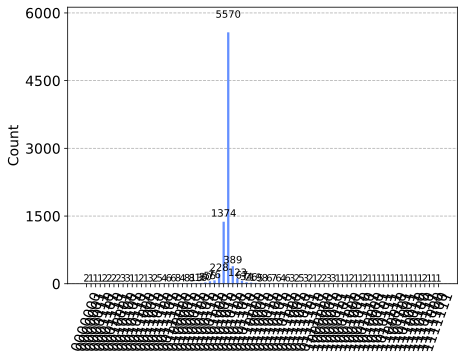

In [15]:
backend = QasmSimulator()
answer = backend.run(qc.decompose(), shots= 8192).result().get_counts()

plot_histogram(answer)

In [16]:
answer

{'0101011': 5570,
 '0110101': 7,
 '0101001': 228,
 '0101010': 1374,
 '0110110': 6,
 '1000111': 1,
 '1001010': 1,
 '1110100': 1,
 '0100111': 55,
 '1000001': 2,
 '0110000': 26,
 '1000101': 1,
 '0101100': 389,
 '0110100': 6,
 '0000110': 1,
 '0101111': 34,
 '0110001': 19,
 '1111111': 1,
 '1000011': 3,
 '0101110': 67,
 '0110010': 5,
 '1000010': 3,
 '0101101': 123,
 '0110011': 8,
 '0100110': 30,
 '0111010': 2,
 '0001111': 2,
 '0011010': 3,
 '1001001': 2,
 '0111000': 6,
 '0101000': 76,
 '0001101': 2,
 '1110111': 2,
 '0100100': 13,
 '0100010': 8,
 '0111110': 2,
 '1001110': 1,
 '0100011': 8,
 '0111101': 3,
 '0011100': 5,
 '0001110': 2,
 '1110110': 1,
 '0100101': 16,
 '0111011': 5,
 '0100001': 4,
 '0111111': 1,
 '1110010': 1,
 '0011110': 6,
 '1100010': 1,
 '0110111': 4,
 '1111100': 1,
 '1001000': 1,
 '0111001': 3,
 '0011111': 6,
 '0010101': 3,
 '0010001': 2,
 '1010101': 1,
 '0100000': 8,
 '0011011': 2,
 '0010100': 3,
 '1010000': 1,
 '1011111': 1,
 '0011000': 2,
 '1101011': 1,
 '1010011': 1,
 '00

In [17]:
# the highest probability result is close to 1/3:
int('0101011',2)/2**n_b

0.3359375

In [18]:
# with probability
answer['0101011']/8192

0.679931640625

In [19]:
# the second one 
int('0101010',2)/2**n_b

0.328125

In [20]:
# with probability
answer['0101010']/8192

0.167724609375